This example shows how to fit boosted trees via the AdaBoost algorithm. See https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-twoclass-py

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
np.random.seed(1)

Let us generate a simple two-dimensional dataset ...

In [2]:
from sklearn.datasets import make_gaussian_quantiles

X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# instantiate the base model; note that we use
# a simple decision stump here (tree of max_depth 1!)
base_model = DecisionTreeClassifier(max_depth=1)

# instantiate the AdaBoost model
model = AdaBoostClassifier(base_model, algorithm="SAMME", n_estimators=10)

# fit the model
model.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=10)

Next, we plot the decision surface of the overall AdaBoost model.

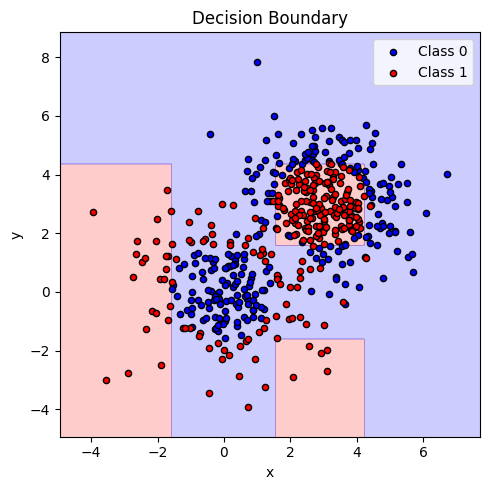

In [4]:
import graphviz 
from sklearn import tree
from IPython.display import display
plot_colors = "br"
plot_step = 0.02
class_names = "01"

plt.figure(figsize=(5, 5))

# Plot the decision boundaries
plt.subplot(111)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, colors=["b","b","r","r"], levels=[-0.5,0,0.5,1], extend="both", alpha=0.2)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, 
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()


Finally, let us plot the decision surfaces and the tree structures of the individual trees. Note that the trees are built on modified training instances (weights!).

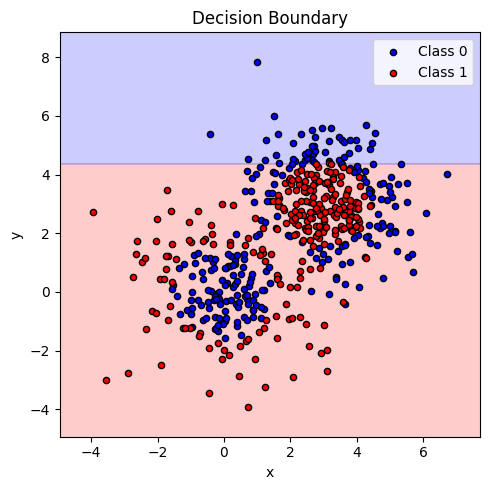

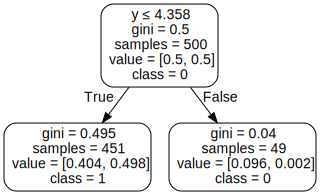

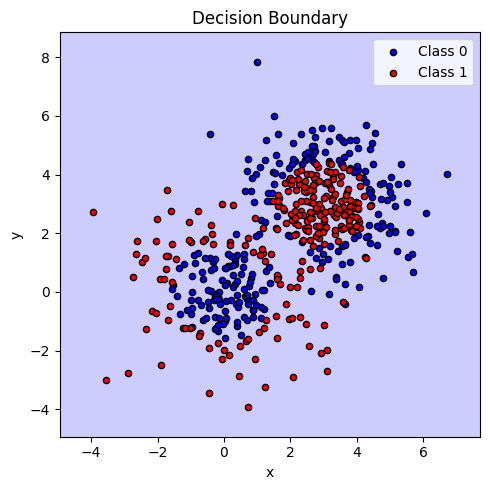

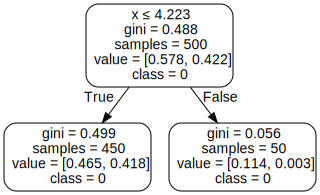

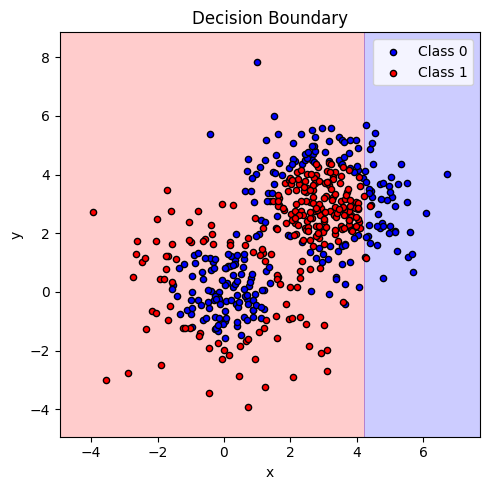

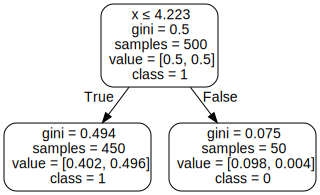

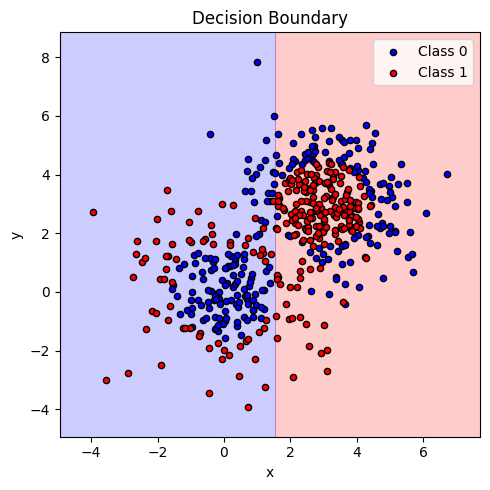

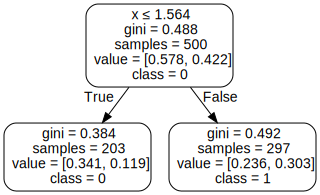

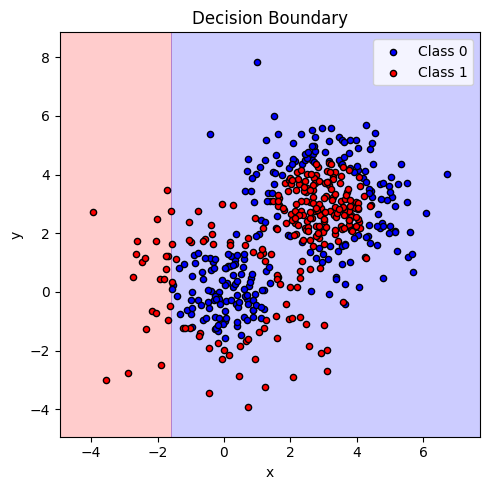

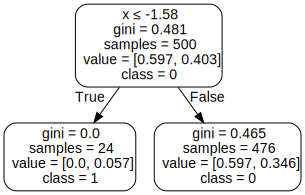

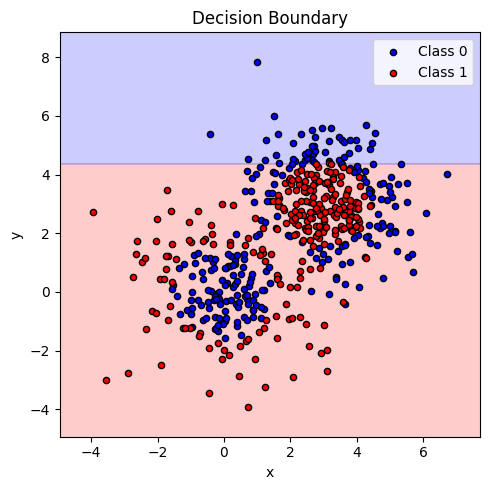

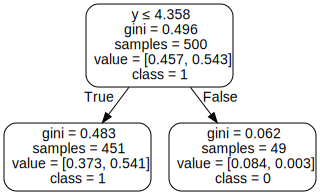

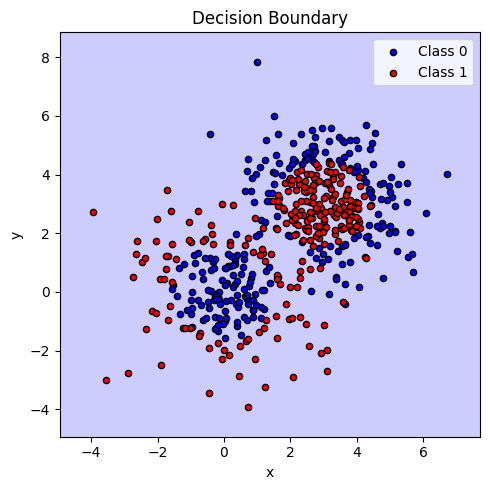

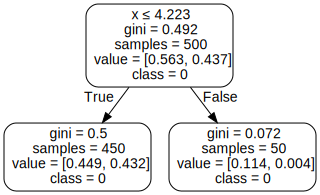

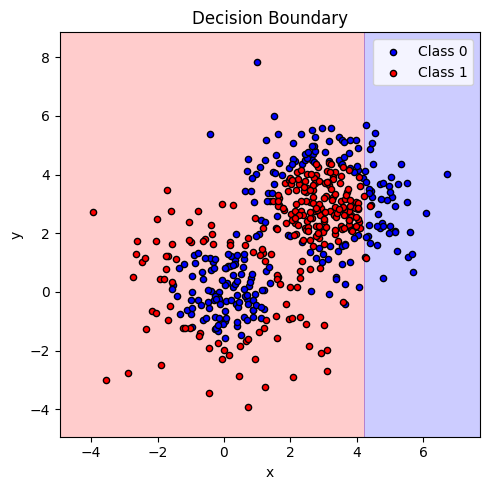

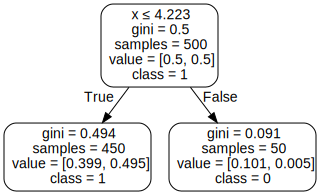

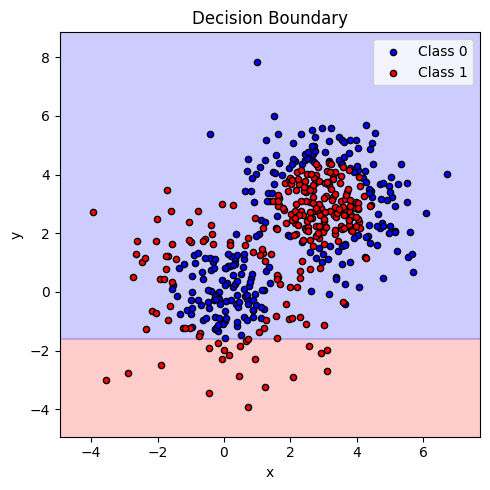

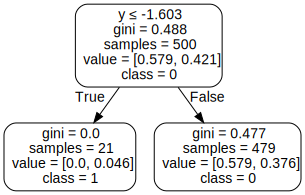

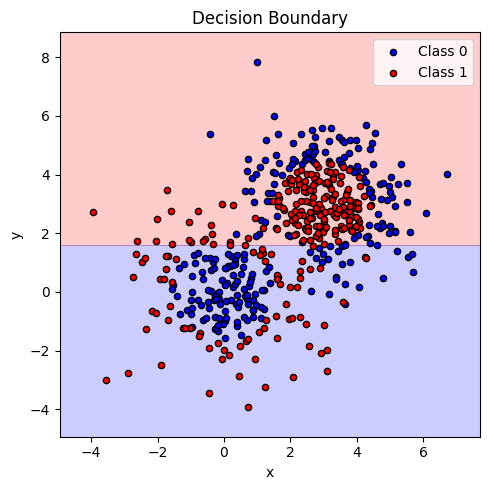

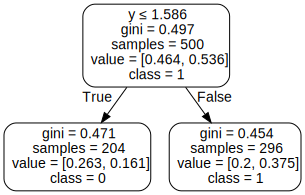

In [5]:
import graphviz 
from sklearn import tree
from IPython.display import display

plot_colors = "br"
plot_step = 0.02
class_names = "01"

for model_plot in model.estimators_:
    
    plt.figure(figsize=(5, 5))

    # Plot the decision boundaries
    plt.subplot(111)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = model_plot.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, colors=["b","b","r","r"], levels=[-0.5,0,0.5,1], extend="both", alpha=0.2)

    
    plt.axis("tight")

    # Plot the training points
    for i, n, c in zip(range(2), class_names, plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1],
                    c=c, 
                    s=20, edgecolor='k',
                    label="Class %s" % n)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(loc='upper right')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.35)
    plt.show()
    

    dot_data = tree.export_graphviz(model_plot, 
                                    out_file=None, 
                                    feature_names=["x","y"],  
                                    class_names=["0","1"],  
                                    filled=False, 
                                    rounded=True,  
                                    special_characters=True) 
    graph = graphviz.Source(dot_data) 
    display(graph)